In [35]:
import os
import matplotlib.pyplot as plt
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/ajay/Downloads/mykey.json"

### Detecting Text from local

In [22]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

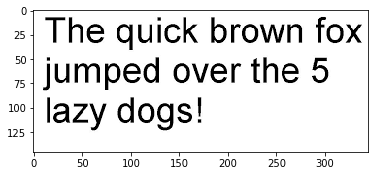

In [23]:
image = plt.imread("C:/Users/ajay/Downloads/OCR2.png")
plt.imshow(image)

In [24]:
detect_text("C:/Users/ajay/Downloads/OCR2.png")

Texts:

"The quick brown fox
jumped over the 5
lazy dogs!
"
bounds: (10,6),(337,6),(337,123),(10,123)

"The"
bounds: (12,7),(72,6),(72,33),(12,34)

"quick"
bounds: (86,7),(168,6),(168,39),(86,40)

"brown"
bounds: (183,7),(276,6),(276,33),(183,34)

"fox"
bounds: (291,6),(337,6),(337,33),(291,33)

"jumped"
bounds: (10,48),(129,47),(129,81),(10,82)

"over"
bounds: (144,55),(213,54),(213,74),(144,75)

"the"
bounds: (225,48),(272,47),(272,73),(225,74)

"5"
bounds: (287,49),(303,49),(303,75),(287,75)

"lazy"
bounds: (14,90),(75,90),(75,123),(14,123)

"dogs!"
bounds: (88,90),(173,90),(173,123),(88,123)


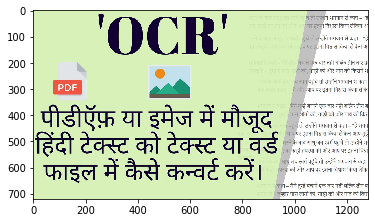

In [25]:
image = plt.imread("C:/Users/ajay/Downloads/hinditextOCR.jpg")
plt.imshow(image)

In [26]:
detect_text("C:/Users/ajay/Downloads/hinditextOCR.jpg")

Texts:

"'OCR'
्वचे तो उन्होंने भगवान से कहा - "हे
|पर इतना विश्वास किया लेकिन अ
मरने के
सा जगहुँचे तो उन्होंने भगवान से कहा- "हे
तक कडी तपरया की औरपर इतना विश्वास किया लेकिन आ
गवान न कमैन तुम्ह बचाने एक बार नहीं बल्कि तीन बार प्र
लगता है वम्हार पस ला गों को, गाड़ी को और नावं को किसने भे
मरने के ब स्वर्ग पहुंचे तो उन्होंने भगवान से कहा
तक कडी तपर
PDF
की और आप पर इतना विश्वास किया लेकि
वान ने क
मैंने तुम्हे बचाने एक बार नहीं बल्कि तीन ब
पहार पास लोगों को, गाड़ी को और नावं को किस्
पीडीऍफ़ या इमेज में मौजूद
हिंदी टेक्स्ट को टेक्स्ट या वर्ड
फाइल में कैसे कन्वर्ट करें।
पहुंचे तो उन्होंने भगवान से कहा -"हे भगव
आप पर इतना विश्वास किया लेकिन आप मुई
मरने के बाद साधू जब स्वर्ग पहुंचे तो उन्होंने भ
तक कड़ी तपस्या की और आप पर इतना विश्वा
न के सधू जब स्वर्ग पहुंचे तो उन्होंने भगवान से कहा
क पस्या की और आप पर इतना विश्वास किया लेकि-
कहा - मैंने तुम्हे बचाने एक बार नहीं बल्कि तीन ब
तुम्हारे पास लोगों को, गाड़ी को और नावं को किसी
वान
नगला
"
bounds: (8,12),(1279,12),(1279,712),(8,712)

"'OCR'"
bounds: 

### Detecting Text from Remote location

In [27]:
def detect_text_uri(uri):
    """Detects text in the file located in Google Cloud Storage or on the Web.
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.types.Image()
    image.source.image_uri = uri

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [28]:
ocr3_url = 'https://storage.cloud.google.com/buck910/ocr1.png'

In [29]:
detect_text_uri('gs://buck910/ocr3.png')

Texts:

"Explain
that
Stuff!
01234567890
"
bounds: (30,9),(274,9),(274,171),(30,171)

"Explain"
bounds: (54,10),(223,9),(223,42),(54,43)

"that"
bounds: (93,55),(185,55),(185,81),(93,81)

"Stuff!"
bounds: (68,101),(204,101),(204,126),(68,126)

"01234567890"
bounds: (30,146),(274,146),(274,171),(30,171)


### Handwritten Image

In [30]:
def detect_document(path):
    """Detects document features in an image."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.document_text_detection(image=image)

    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            print('\nBlock confidence: {}\n'.format(block.confidence))

            for paragraph in block.paragraphs:
                print('Paragraph confidence: {}'.format(
                    paragraph.confidence))

                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    print('Word text: {} (confidence: {})'.format(
                        word_text, word.confidence))

                    for symbol in word.symbols:
                        print('\tSymbol: {} (confidence: {})'.format(
                            symbol.text, symbol.confidence))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

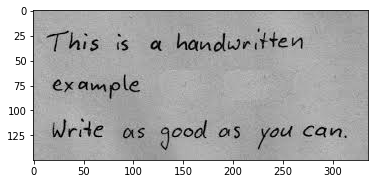

In [31]:
image = plt.imread("C:/Users/ajay/Downloads/ocr_handwritten.jpg")
plt.imshow(image)

In [32]:
detect_document("C:/Users/ajay/Downloads/ocr_handwritten.jpg")


Block confidence: 0.9800000190734863

Paragraph confidence: 0.9800000190734863
Word text: This (confidence: 0.9900000095367432)
	Symbol: T (confidence: 0.9900000095367432)
	Symbol: h (confidence: 0.9900000095367432)
	Symbol: i (confidence: 0.9900000095367432)
	Symbol: s (confidence: 1.0)
Word text: is (confidence: 0.9700000286102295)
	Symbol: i (confidence: 0.9399999976158142)
	Symbol: s (confidence: 1.0)
Word text: a (confidence: 1.0)
	Symbol: a (confidence: 1.0)

Block confidence: 0.9900000095367432

Paragraph confidence: 0.9900000095367432
Word text: handwritten (confidence: 0.9900000095367432)
	Symbol: h (confidence: 0.9900000095367432)
	Symbol: a (confidence: 0.9900000095367432)
	Symbol: n (confidence: 0.9900000095367432)
	Symbol: d (confidence: 1.0)
	Symbol: w (confidence: 0.9900000095367432)
	Symbol: r (confidence: 0.9900000095367432)
	Symbol: i (confidence: 1.0)
	Symbol: t (confidence: 1.0)
	Symbol: t (confidence: 1.0)
	Symbol: e (confidence: 1.0)
	Symbol: n (confidence: 1.0)


### Detecting Text in Files(PDF)

In [13]:
def async_detect_document(gcs_source_uri, gcs_destination_uri):
    """OCR with PDF/TIFF as source files on GCS"""
    import re
    from google.cloud import vision
    from google.cloud import storage
    from google.protobuf import json_format
    # Supported mime_types are: 'application/pdf' and 'image/tiff'
    mime_type = 'application/pdf'

    # How many pages should be grouped into each json output file.
    batch_size = 2

    client = vision.ImageAnnotatorClient()

    feature = vision.types.Feature(
        type=vision.enums.Feature.Type.DOCUMENT_TEXT_DETECTION)

    gcs_source = vision.types.GcsSource(uri=gcs_source_uri)
    input_config = vision.types.InputConfig(
        gcs_source=gcs_source, mime_type=mime_type)

    gcs_destination = vision.types.GcsDestination(uri=gcs_destination_uri)
    output_config = vision.types.OutputConfig(
        gcs_destination=gcs_destination, batch_size=batch_size)

    async_request = vision.types.AsyncAnnotateFileRequest(
        features=[feature], input_config=input_config,
        output_config=output_config)

    operation = client.async_batch_annotate_files(
        requests=[async_request])

    print('Waiting for the operation to finish.')
    operation.result(timeout=420)

    # Once the request has completed and the output has been
    # written to GCS, we can list all the output files.
    storage_client = storage.Client()

    match = re.match(r'gs://([^/]+)/(.+)', gcs_destination_uri)
    bucket_name = match.group(1)
    prefix = match.group(2)

    bucket = storage_client.get_bucket(bucket_name)

    # List objects with the given prefix.
    blob_list = list(bucket.list_blobs(prefix=prefix))
    print('Output files:')
    for blob in blob_list:
        print(blob.name)

    # Process the first output file from GCS.
    # Since we specified batch_size=2, the first response contains
    # the first two pages of the input file.
    output = blob_list[0]

    json_string = output.download_as_string()
    response = json_format.Parse(
        json_string, vision.types.AnnotateFileResponse())

    # The actual response for the first page of the input file.
    first_page_response = response.responses[0]
    annotation = first_page_response.full_text_annotation

    # Here we print the full text from the first page.
    # The response contains more information:
    # annotation/pages/blocks/paragraphs/words/symbols
    # including confidence scores and bounding boxes
    print(u'Full text:\n{}'.format(
        annotation.text))

In [14]:
async_detect_document('gs://buck910/samplepdf2.pdf','gs://buck910/samplepdf2_out.pdf')

Waiting for the operation to finish.
Output files:
samplepdf2_out.pdfoutput-1-to-2.json
samplepdf2_out.pdfoutput-3-to-4.json
Full text:
a
ACCELIO.
PDF BOOKMARK SAMPLE
Sample Date:
May 2001
Prepared by:
Accelio Present Applied Technology
Created and Tested Using:
Accelio Present Central 5.4
.
Accelio Present Output Designer 5.4
Features Demonstrated:
Primary bookmarks in a PDF file.
Secondary bookmarks in a PDF file.
Overview
This sample consists of a simple form containing four distinct fields. The data file contains eight
separate records.
By default, the data file will produce a PDF file containing eight separate pages. The selective
use of the bookmark file will produce the same PDF with a separate pane containing
bookmarks. This screenshot of the sample output shows a PDF file with bookmarks.
Acrobat Reader - [ap_bookmark.pdf]
File Edit Document View Window Help
Bookmarks Thumbnails
-Invoices by Date
2000-01-1
2000-01-2
2000-01-3
2000-01-4
2000-01-5
- 2000-01-6
2000-01-7
-2000-01-8

### Batch Processing of files

In [15]:
import io

from google.cloud import vision_v1
from google.cloud.vision_v1 import enums


def sample_batch_annotate_files(file_path="path/to/your/document.pdf"):
    """Perform batch file annotation."""
    client = vision_v1.ImageAnnotatorClient()

    # Supported mime_type: application/pdf, image/tiff, image/gif
    mime_type = "application/pdf"
    with io.open(file_path, "rb") as f:
        content = f.read()
    input_config = {"mime_type": mime_type, "content": content}
    features = [{"type": enums.Feature.Type.DOCUMENT_TEXT_DETECTION}]

    # The service can process up to 5 pages per document file. Here we specify
    # the first, second, and last page of the document to be processed.
    pages = [1, 2, -1]
    requests = [{"input_config": input_config, "features": features, "pages": pages}]

    response = client.batch_annotate_files(requests)
    for image_response in response.responses[0].responses:
        print(u"Full text: {}".format(image_response.full_text_annotation.text))
        for page in image_response.full_text_annotation.pages:
            for block in page.blocks:
                print(u"\nBlock confidence: {}".format(block.confidence))
                for par in block.paragraphs:
                    print(u"\tParagraph confidence: {}".format(par.confidence))
                    for word in par.words:
                        print(u"\t\tWord confidence: {}".format(word.confidence))
                        for symbol in word.symbols:
                            print(
                                u"\t\t\tSymbol: {}, (confidence: {})".format(
                                    symbol.text, symbol.confidence
                                )
                            )


In [16]:
sample_batch_annotate_files("C:/Users/ajay/Downloads/samplepdf3.pdf")

Full text: pdf995
Create PDF files quickly and easily!
The pdf995 suite of products - Pdf995, PdfEdit995, and Signature995 - is a complete solution for your document publishing needs. It
provides ease of use, flexibility in format, and industry-standard security- and all at no cost to you.
Pdf995 makes it easy and affordable to create professional-quality documents in the popular PDF file format. Its easy-to-use interface
helps you to create PDF files by simply selecting the "print" command from any application, creating documents which can be viewed
on any computer with a PDF viewer. Pdf995 supports network file saving, fast user switching on XP, Citrix/Terminal Server, custom
page sizes and large format printing. Pdf995 is a printer driver that works with any Postscript to PDF converter. The pdf995 printer
driver and a free Converter are available for easy download.
PdfEdit995 offers a wealth of additional functionality, such as: combining documents into a single PDF; automatic link 

			Symbol: i, (confidence: 1.0)
			Symbol: g, (confidence: 1.0)
			Symbol: n, (confidence: 1.0)
			Symbol: a, (confidence: 1.0)
			Symbol: t, (confidence: 1.0)
			Symbol: u, (confidence: 1.0)
			Symbol: r, (confidence: 1.0)
			Symbol: e, (confidence: 1.0)
			Symbol: s, (confidence: 1.0)
		Word confidence: 0.9900000095367432
			Symbol: ., (confidence: 0.9900000095367432)

Block confidence: 0.9900000095367432
	Paragraph confidence: 0.9900000095367432
		Word confidence: 0.9900000095367432
			Symbol: T, (confidence: 0.9900000095367432)
			Symbol: h, (confidence: 0.9900000095367432)
			Symbol: e, (confidence: 1.0)
		Word confidence: 0.9700000286102295
			Symbol: P, (confidence: 0.9900000095367432)
			Symbol: d, (confidence: 0.9900000095367432)
			Symbol: f, (confidence: 0.8700000047683716)
			Symbol: 9, (confidence: 0.9900000095367432)
			Symbol: 9, (confidence: 0.9900000095367432)
			Symbol: 5, (confidence: 0.9900000095367432)
		Word confidence: 0.9900000095367432
			Symbol: S, (confidence

			Symbol: v, (confidence: 0.9900000095367432)
			Symbol: e, (confidence: 1.0)
			Symbol: r, (confidence: 0.9900000095367432)
			Symbol: t, (confidence: 1.0)
		Word confidence: 1.0
			Symbol: P, (confidence: 1.0)
			Symbol: D, (confidence: 1.0)
			Symbol: F, (confidence: 1.0)
		Word confidence: 0.9800000190734863
			Symbol: t, (confidence: 0.9700000286102295)
			Symbol: o, (confidence: 1.0)
		Word confidence: 0.9900000095367432
			Symbol: H, (confidence: 0.9900000095367432)
			Symbol: T, (confidence: 0.9900000095367432)
			Symbol: M, (confidence: 1.0)
			Symbol: L, (confidence: 1.0)
		Word confidence: 0.9900000095367432
			Symbol: a, (confidence: 0.9900000095367432)
			Symbol: n, (confidence: 1.0)
			Symbol: d, (confidence: 0.9900000095367432)
		Word confidence: 0.9900000095367432
			Symbol: W, (confidence: 0.9900000095367432)
			Symbol: o, (confidence: 0.9900000095367432)
			Symbol: r, (confidence: 1.0)
			Symbol: d, (confidence: 0.9900000095367432)
		Word confidence: 0.99000000953674

			Symbol: l, (confidence: 0.9900000095367432)
			Symbol: d, (confidence: 1.0)
		Word confidence: 0.9900000095367432
			Symbol: W, (confidence: 0.9900000095367432)
			Symbol: i, (confidence: 1.0)
			Symbol: d, (confidence: 1.0)
			Symbol: e, (confidence: 1.0)
		Word confidence: 1.0
			Symbol: W, (confidence: 1.0)
			Symbol: e, (confidence: 1.0)
			Symbol: b, (confidence: 1.0)
		Word confidence: 0.9900000095367432
			Symbol: ., (confidence: 0.9900000095367432)
		Word confidence: 0.9900000095367432
			Symbol: A, (confidence: 0.9900000095367432)
			Symbol: l, (confidence: 0.9900000095367432)
			Symbol: l, (confidence: 0.9900000095367432)
		Word confidence: 0.9900000095367432
			Symbol: a, (confidence: 0.9900000095367432)
			Symbol: s, (confidence: 0.9900000095367432)
			Symbol: p, (confidence: 0.9900000095367432)
			Symbol: e, (confidence: 1.0)
			Symbol: c, (confidence: 1.0)
			Symbol: t, (confidence: 1.0)
			Symbol: s, (confidence: 0.9900000095367432)
		Word confidence: 1.0
			Symbol: o

			Symbol: e, (confidence: 1.0)
		Word confidence: 1.0
			Symbol: o, (confidence: 1.0)
			Symbol: f, (confidence: 1.0)
		Word confidence: 0.9900000095367432
			Symbol: ", (confidence: 0.9900000095367432)
		Word confidence: 0.9900000095367432
			Symbol: w, (confidence: 0.9900000095367432)
			Symbol: h, (confidence: 0.9900000095367432)
			Symbol: a, (confidence: 0.9900000095367432)
			Symbol: t, (confidence: 1.0)
		Word confidence: 0.9900000095367432
			Symbol: w, (confidence: 0.9900000095367432)
			Symbol: e, (confidence: 1.0)
			Symbol: n, (confidence: 0.9900000095367432)
			Symbol: t, (confidence: 1.0)
		Word confidence: 0.9900000095367432
			Symbol: w, (confidence: 0.9900000095367432)
			Symbol: h, (confidence: 0.9900000095367432)
			Symbol: e, (confidence: 1.0)
			Symbol: r, (confidence: 1.0)
			Symbol: e, (confidence: 1.0)
		Word confidence: 0.9900000095367432
			Symbol: ", (confidence: 0.9900000095367432)
		Word confidence: 0.9900000095367432
			Symbol: ,, (confidence: 0.990000009

		Word confidence: 1.0
			Symbol: G, (confidence: 1.0)
			Symbol: r, (confidence: 1.0)
			Symbol: a, (confidence: 1.0)
			Symbol: p, (confidence: 1.0)
			Symbol: h, (confidence: 1.0)
			Symbol: i, (confidence: 1.0)
			Symbol: c, (confidence: 1.0)
			Symbol: a, (confidence: 1.0)
			Symbol: l, (confidence: 1.0)
		Word confidence: 1.0
			Symbol: R, (confidence: 1.0)
			Symbol: e, (confidence: 1.0)
			Symbol: p, (confidence: 1.0)
			Symbol: r, (confidence: 1.0)
			Symbol: e, (confidence: 1.0)
			Symbol: s, (confidence: 1.0)
			Symbol: e, (confidence: 1.0)
			Symbol: n, (confidence: 1.0)
			Symbol: t, (confidence: 1.0)
			Symbol: a, (confidence: 1.0)
			Symbol: t, (confidence: 1.0)
			Symbol: i, (confidence: 1.0)
			Symbol: o, (confidence: 1.0)
			Symbol: n, (confidence: 1.0)
		Word confidence: 1.0
			Symbol: o, (confidence: 1.0)
			Symbol: f, (confidence: 1.0)
		Word confidence: 1.0
			Symbol: I, (confidence: 1.0)
			Symbol: n, (confidence: 1.0)
			Symbol: v, (confidence: 1.0)
			Symbol: e

### Writing Image output to google storage

In [37]:
from google.cloud import vision_v1
from google.cloud.vision_v1 import enums


def sample_async_batch_annotate_images(
    input_image_uri="gs://buck910/ocr2.png",
    output_uri="gs://buck910/",
):
    """Perform async batch image annotation."""
    client = vision_v1.ImageAnnotatorClient()

    source = {"image_uri": input_image_uri}
    image = {"source": source}
    features = [
        {"type": enums.Feature.Type.LABEL_DETECTION},
        {"type": enums.Feature.Type.IMAGE_PROPERTIES},
    ]

    # Each requests element corresponds to a single image.  To annotate more
    # images, create a request element for each image and add it to
    # the array of requests
    requests = [{"image": image, "features": features}]
    gcs_destination = {"uri": output_uri}

    # The max number of responses to output in each JSON file
    batch_size = 2
    output_config = {"gcs_destination": gcs_destination,
                     "batch_size": batch_size}

    operation = client.async_batch_annotate_images(requests, output_config)

    print("Waiting for operation to complete...")
    response = operation.result(90)

    # The output is written to GCS with the provided output_uri as prefix
    gcs_output_uri = response.output_config.gcs_destination.uri
    print("Output written to GCS with prefix: {}".format(gcs_output_uri))


In [38]:
sample_async_batch_annotate_images()

Waiting for operation to complete...
Output written to GCS with prefix: gs://buck910/


### Batch Processing of Image text

In [64]:
from google.cloud import storage
storage_client = storage.Client()

# Note: Client.list_blobs requires at least package version 1.17.0.
blobs = storage_client.list_blobs('buck910', prefix='OCR/', delimiter='/')

input_image_uri = []
for blob in blobs:
    input_image_uri.append("gs:/buck910/OCR/" + blob.name)
    
img_list = input_image_uri[1:]

In [74]:
img_list

['gs:/buck910/OCR/OCR/ocr1.png',
 'gs:/buck910/OCR/OCR/ocr2.png',
 'gs:/buck910/OCR/OCR/ocr3.png']

In [68]:
def sample_async_batch_annotate_images(x,output_uri):
    """Perform async batch image annotation."""
    client = vision_v1.ImageAnnotatorClient()
    
    requests=[]
    for input_image_uri in x:
        source = {"image_uri": input_image_uri}
        image = {"source": source}
        features = [
            {"type": enums.Feature.Type.LABEL_DETECTION},
            {"type": enums.Feature.Type.IMAGE_PROPERTIES},
        ]
        # Each requests element corresponds to a single image.  To annotate more
        # images, create a request element for each image and add it to
        # the array of requests
        requests.append({"image": image, "features": features})
        
    gcs_destination = {"uri": output_uri}
    # The max number of responses to output in each JSON file
    batch_size = 1
    output_config = {"gcs_destination": gcs_destination,
                     "batch_size": batch_size}

    operation = client.async_batch_annotate_images(requests, output_config)
    print("Waiting for operation to complete...")
    response = operation.result(90)
    # The output is written to GCS with the provided output_uri as prefix
    gcs_output_uri = response.output_config.gcs_destination.uri
    print("Output written to GCS with prefix: {}".format(gcs_output_uri))